<a href="https://colab.research.google.com/github/anandaditya07/Smart-Energy-Consumption-Analysis-and-Prediction-using-Machine-Learning-with-Device-Level-Insights/blob/main/Aditya_Anand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **WEEK 1 & 2**


**Module 1: Data Collection and Understanding**


1. **Define project scope and functional objectives for smart energy analysis.**



This project is about understanding how much electricity different appliances in a smart home use. Instead of only seeing one total electricity bill at the end of the month, we want to see which device uses how much power and when. This will help us know where energy is being wasted.

**Functional Objectives**

*   Track energy usage of each device and each room separately.
*   Show energy use in the form of graphs (hourly, daily, weekly).
*   Find which devices use the most power and at what time.
*   Use machine learning to predict future electricity use.
*   Help save electricity by giving suggestions to reduce unnecessary usage.


2. **Collect and structure the SmartHome Energy Monitoring Dataset**

In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

path = "/content/drive/MyDrive/HomeC_augmented.csv"
df = pd.read_csv(path)

Mounted at /content/drive


In [3]:
# Read the CSV
df_raw = pd.read_csv(path)

print("Original shape:", df_raw.shape)
df_raw.head()

Original shape: (503910, 42)


,Unnamed: 0,time,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
0,0,2016-01-01 05:00:00,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
1,1,2016-01-01 05:01:00,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2,2,2016-01-01 05:02:00,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
3,3,2016-01-01 05:03:00,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
4,4,2016-01-01 05:04:00,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


In [4]:
# Column names
df.columns


Index(['Unnamed: 0', 'time', 'Dishwasher', 'Home office', 'Fridge',
       'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave',
       'Living room', 'temperature', 'humidity', 'visibility',
       'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover',
       'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability',
       'Furnace', 'Kitchen', 'year', 'month', 'day', 'weekday', 'weekofyear',
       'hour', 'minute', 'timing', 'use_HO', 'gen_Sol', 'Car charger [kW]',
       'Water heater [kW]', 'Air conditioning [kW]', 'Home Theater [kW]',
       'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]',
       'Pool Pump [kW]'],
      dtype='object')

In [5]:
# Basic info – data types, nulls, etc.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 42 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             503910 non-null  int64  
 1   time                   503910 non-null  object 
 2   Dishwasher             503910 non-null  float64
 3   Home office            503910 non-null  float64
 4   Fridge                 503910 non-null  float64
 5   Wine cellar            503910 non-null  float64
 6   Garage door            503910 non-null  float64
 7   Barn                   503910 non-null  float64
 8   Well                   503910 non-null  float64
 9   Microwave              503910 non-null  float64
 10  Living room            503910 non-null  float64
 11  temperature            503910 non-null  float64
 12  humidity               503910 non-null  float64
 13  visibility             503910 non-null  float64
 14  apparentTemperature    503910 non-nu

In [6]:
# Basic statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,503910.0,251954.500000,145466.431410,0.000000,125977.250000,251954.500000,377931.750000,503909.000000
Dishwasher,503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767
Home office,503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750
Fridge,503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267
Wine cellar,503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933
Garage door,503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983
Barn,503910.0,0.058530,0.202706,0.000000,0.029833,0.031317,0.032883,7.027900
Well,503910.0,0.015642,0.137841,0.000000,0.000983,0.001000,0.001017,1.633017
Microwave,503910.0,0.010983,0.098859,0.000000,0.003617,0.004000,0.004067,1.929800
Living room,503910.0,0.035313,0.096056,0.000000,0.001483,0.001617,0.001750,0.465217


In [7]:
import pandas as pd
# Change 'timestamp' to the actual time column name from df_raw.columns
time_col = "time"   # e.g. "date", "time", "Datetime" etc.

# Convert to datetime
df_raw[time_col] = pd.to_datetime(df_raw[time_col], errors='coerce')

# Drop rows where timestamp could not be parsed
df_raw = df_raw.dropna(subset=[time_col])

# Sort by time
df_raw = df_raw.sort_values(time_col);

# Set timestamp as index
df = df_raw.set_index(time_col)

print("After setting time index:", df.shape)
df.head()

After setting time index: (503910, 41)


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
time,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0,0.000033,0.442633,0.124150,0.006983,0.013083,0.031350,0.001017,0.004067,0.001517,...,0.932833,0.003483,0.013034,0.000241,0.013796,0.000519,0.0014,0.020147,0.000000,0.000746
2016-01-01 05:01:00,1,0.000000,0.444067,0.124000,0.006983,0.013117,0.031500,0.001017,0.004067,0.001650,...,0.934333,0.003467,0.021769,0.000978,0.014487,0.000543,0.0008,0.030903,0.000000,0.002249
2016-01-01 05:02:00,2,0.000017,0.446067,0.123533,0.006983,0.013083,0.031517,0.001000,0.004067,0.001650,...,0.931817,0.003467,0.028218,0.000642,0.014498,0.000481,0.0012,0.000000,0.001883,0.003971
2016-01-01 05:03:00,3,0.000017,0.446583,0.123133,0.006983,0.013000,0.031500,0.001017,0.004067,0.001617,...,1.022050,0.003483,0.036478,0.000218,0.014181,0.000531,0.0016,0.024038,0.002610,0.003673
2016-01-01 05:04:00,4,0.000133,0.446533,0.122850,0.006850,0.012783,0.031500,0.001017,0.004067,0.001583,...,1.139400,0.003467,0.044295,0.000844,0.014949,0.001052,0.0020,0.000000,0.002462,0.005006


In [8]:
# All devices/measurements (since time is now index)
device_cols = df.columns.tolist()
print("Device / sensor columns:", device_cols[:10])

Device / sensor columns: ['Unnamed: 0', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room']




3. **Verify data integrity, handle missing timestamps, and perform exploratory analysis.**



i. Check Data Integrity

  We verify whether the dataset has:

*   Repeated timestamps
*   Empty/Missing data

    If yes, we fix them.




In [9]:
import pandas as pd
print("\n~~~~~~~ MISSING TIMESTAMP HANDLING ~~~~~~~")
# Try to guess the time gap between readings (like 1 hour / 5 min)
inferred_freq = pd.infer_freq(df.index[:100])
print("Inferred frequency:", inferred_freq)

# If frequency cannot be detected → assume 1 hour gap
if inferred_freq is None:
    inferred_freq = '1H'

# Create a new continuous timeline with no gaps
full_range = pd.date_range(start=df.index.min(),
                           end=df.index.max(),
                           freq=inferred_freq)

# Reindex so dataset follows this timeline
df = df.reindex(full_range)
df.index.name = "timestamp"

# Fill empty values created by reindexing
df = df.ffill().bfill()
print("Missing values after filling:")
print(df.isna().sum())


~~~~~~~ MISSING TIMESTAMP HANDLING ~~~~~~~
Inferred frequency: min
Missing values after filling:
Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger

ii. Handle Missing Timestamps

We ensure time moves smoothly with no missing timestamps,
and we fill gaps in the data by copying nearby values.

In [10]:
import pandas as pd
print("\n~~~~~~~ MISSING TIMESTAMP HANDLING ~~~~~~~")
# Try to guess the time gap between readings (like 1 hour / 5 min)
inferred_freq = pd.infer_freq(df.index[:100])
print("Inferred frequency:", inferred_freq)
# If frequency cannot be detected → assume 1 hour gap
if inferred_freq is None:
    inferred_freq = '1H'
# Create a new continuous timeline with no gaps
full_range = pd.date_range(start=df.index.min(),
                           end=df.index.max(),
                           freq=inferred_freq)
# Reindex so dataset follows this timeline
df = df.reindex(full_range)
df.index.name = "timestamp"
# Fill empty values created by reindexing
df = df.ffill().bfill()
print("Missing values after filling:")
print(df.isna().sum())


~~~~~~~ MISSING TIMESTAMP HANDLING ~~~~~~~
Inferred frequency: min
Missing values after filling:
Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger

iii. Exploratory Data Analysis
* Minimum, maximum, average energy usage per device

* Graph that shows how energy usage changes with time



~~~~~~EXPLORATORY ANALYSIS ~~~~~~~


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,503910.0,251954.500000,145466.431410,0.000000,125977.250000,251954.500000,377931.750000,503909.000000
Dishwasher,503910.0,0.031368,0.190951,0.000000,0.000000,0.000017,0.000233,1.401767
Home office,503910.0,0.081287,0.104466,0.000083,0.040383,0.042217,0.068283,0.971750
Fridge,503910.0,0.063556,0.076199,0.000067,0.005083,0.005433,0.125417,0.851267
Wine cellar,503910.0,0.042137,0.057967,0.000017,0.007133,0.008083,0.053192,1.273933
Garage door,503910.0,0.014139,0.014292,0.000017,0.012733,0.012933,0.013100,1.088983
Barn,503910.0,0.058530,0.202706,0.000000,0.029833,0.031317,0.032883,7.027900
Well,503910.0,0.015642,0.137841,0.000000,0.000983,0.001000,0.001017,1.633017
Microwave,503910.0,0.010983,0.098859,0.000000,0.003617,0.004000,0.004067,1.929800
Living room,503910.0,0.035313,0.096056,0.000000,0.001483,0.001617,0.001750,0.465217


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


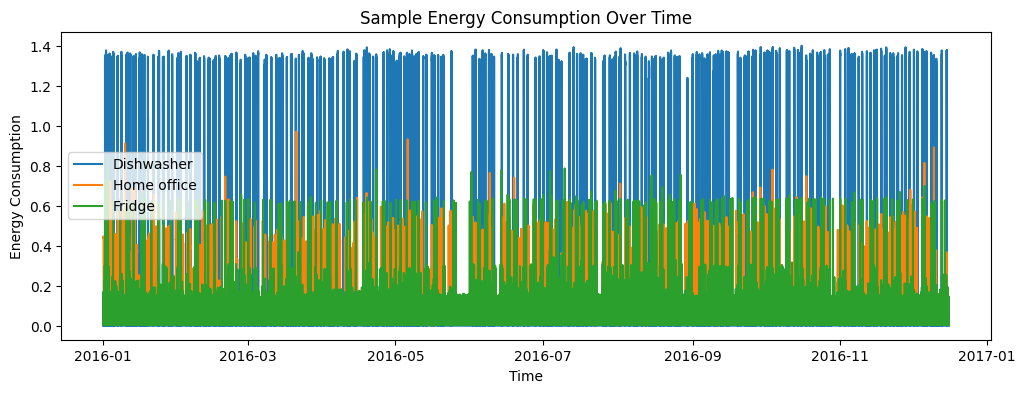

In [11]:
import matplotlib.pyplot as plt
import numpy as np
print("\n~~~~~~EXPLORATORY ANALYSIS ~~~~~~~")
# Show basic numeric statistics for all device columns
display(df.describe().T)
# Show how a few device values change over time
plt.figure(figsize=(12,4))
# Exclude 'Unnamed: 0' from sample_cols for better visualization of energy consumption
sample_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Unnamed: 0'][:3]
for col in sample_cols:
    plt.plot(df.index, df[col], label=col)
plt.xlabel("Time")
plt.ylabel("Energy Consumption")
plt.title("Sample Energy Consumption Over Time")
plt.legend()
plt.show()

**iv**. **Organize energy readings by device, room, and timestamp.**

In [12]:
# Make a copy to be safe
df_device = df.copy()
# Select all numeric columns as device columns
device_cols = df_device.select_dtypes(include=['number']).columns.tolist()
print("Device / sensor columns:", device_cols)
# Convert from wide format → long format
df_long = df_device.reset_index().melt(
    id_vars=["timestamp"],       # column that stays fixed (time)
    value_vars=device_cols,      # columns that will become 'device'
    var_name="device",           # new column name for device name
    value_name="energy"          # new column name for energy value
)
print("Long format shape:", df_long.shape)
df_long.head()

Device / sensor columns: ['Unnamed: 0', 'Dishwasher', 'Home office', 'Fridge', 'Wine cellar', 'Garage door', 'Barn', 'Well', 'Microwave', 'Living room', 'temperature', 'humidity', 'visibility', 'apparentTemperature', 'pressure', 'windSpeed', 'cloudCover', 'windBearing', 'precipIntensity', 'dewPoint', 'precipProbability', 'Furnace', 'Kitchen', 'year', 'month', 'day', 'weekofyear', 'hour', 'minute', 'use_HO', 'gen_Sol', 'Car charger [kW]', 'Water heater [kW]', 'Air conditioning [kW]', 'Home Theater [kW]', 'Outdoor lights [kW]', 'microwave [kW]', 'Laundry [kW]', 'Pool Pump [kW]']
Long format shape: (19652490, 3)


,timestamp,device,energy
0,2016-01-01 05:00:00,Unnamed: 0,0.0
1,2016-01-01 05:01:00,Unnamed: 0,1.0
2,2016-01-01 05:02:00,Unnamed: 0,2.0
3,2016-01-01 05:03:00,Unnamed: 0,3.0
4,2016-01-01 05:04:00,Unnamed: 0,4.0


In [13]:
# Example device → room mapping
# IMPORTANT: change keys to match your real device names
room_map = {
    "Kitchen_Light": "Kitchen",
    "Fridge": "Kitchen",
    "AC_Bedroom": "Bedroom",
    "TV_LivingRoom": "Living Room",
    # Add more device: room pairs here...
}
# Create 'room' column using the mapping
df_long["room"] = df_long["device"].map(room_map).fillna("Unknown")
# Show first few organized rows
df_long.head()

,timestamp,device,energy,room
0,2016-01-01 05:00:00,Unnamed: 0,0.0,Unknown
1,2016-01-01 05:01:00,Unnamed: 0,1.0,Unknown
2,2016-01-01 05:02:00,Unnamed: 0,2.0,Unknown
3,2016-01-01 05:03:00,Unnamed: 0,3.0,Unknown
4,2016-01-01 05:04:00,Unnamed: 0,4.0,Unknown


**Module 2: Data Cleaning and Preprocessing**

i. Handle missing values and outliers in power consumption readings.



In [14]:
import numpy as np # Ensure numpy is imported for np.number, if not already
# Missing values check
print("Missing values before cleaning:")
print(df.isna().sum())

# Fill missing values using forward & backward fill
df = df.ffill().bfill()
print("Missing values after filling:")
print(df.isna().sum())

# Remove outliers using 1st and 99th percentile for each numeric column
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols:
    low, high = df[col].quantile([0.01, 0.99])
    df[col] = df[col].clip(lower=low, upper=high)

print("Outliers handled successfully.")

Missing values before cleaning:
Unnamed: 0               0
Dishwasher               0
Home office              0
Fridge                   0
Wine cellar              0
Garage door              0
Barn                     0
Well                     0
Microwave                0
Living room              0
temperature              0
humidity                 0
visibility               0
apparentTemperature      0
pressure                 0
windSpeed                0
cloudCover               0
windBearing              0
precipIntensity          0
dewPoint                 0
precipProbability        0
Furnace                  0
Kitchen                  0
year                     0
month                    0
day                      0
weekday                  0
weekofyear               0
hour                     0
minute                   0
timing                   0
use_HO                   0
gen_Sol                  0
Car charger [kW]         0
Water heater [kW]        0
Air conditioning [kW]  

ii. Convert timestamps to datetime format and resample data (hourly/daily).

In [15]:
import numpy as np
# PART 2: RESAMPLE DATA (HOURLY / DAILY)

# Select only numeric columns for resampling
numeric_df = df.select_dtypes(include=[np.number])

# Hourly average consumption
df_hourly = numeric_df.resample('h').mean()

print("Hourly data shape:", df_hourly.shape)
df_hourly.head()

Hourly data shape: (8399, 39)


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,5039.09,0.000064,0.241814,0.037861,0.063351,0.013046,0.038881,0.001042,0.004348,0.001505,...,1.044130,0.003307,1.343201,0.033700,0.014520,0.010582,0.117,0.120953,0.017833,0.090792
2016-01-01 06:00:00,5039.09,0.000099,0.043294,0.075522,0.112942,0.012836,0.039181,0.001021,0.004216,0.001618,...,0.918167,0.003422,1.343201,0.106164,0.014299,0.012238,0.117,0.411554,0.027082,0.090792
2016-01-01 07:00:00,5039.09,0.000043,0.043416,0.059486,0.007184,0.013299,0.034439,0.001014,0.004246,0.001629,...,0.714736,0.003448,1.343201,0.127881,0.014002,0.012473,0.117,1.523460,0.027375,0.097588
2016-01-01 08:00:00,5039.09,0.000138,0.065014,0.060412,0.007045,0.012925,0.034195,0.001016,0.004274,0.001634,...,0.960013,0.003447,1.381755,0.125348,0.013986,0.013061,0.117,0.302304,0.033354,0.131010
2016-01-01 09:00:00,5039.09,0.000060,0.043392,0.035106,0.007143,0.013220,0.031830,0.001014,0.004258,0.001650,...,0.639836,0.003439,1.546200,0.059802,0.014145,0.014597,0.117,0.072612,0.062879,0.175744


iii. Normalize or scale energy values for model compatibility.

In [16]:
from sklearn.preprocessing import MinMaxScaler

# PART 3: NORMALIZATION / SCALING

# Select target and features later
df_scaled = df_hourly.copy()

scaler = MinMaxScaler()
df_scaled[df_hourly.columns] = scaler.fit_transform(df_hourly)

df_scaled.head()

,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,use_HO,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW]
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.0,0.000077,0.426328,0.192694,0.365794,0.061182,0.030358,0.001100,0.417247,0.001589,...,0.158436,0.005709,0.000000,0.063941,0.230607,0.000000,0.0,0.043897,0.006201,0.000000
2016-01-01 06:00:00,0.0,0.000120,0.031694,0.409035,0.676320,0.053607,0.031129,0.001020,0.377944,0.001923,...,0.138907,0.005960,0.000000,0.721005,0.225041,0.062730,0.0,0.159056,0.156115,0.000000
2016-01-01 07:00:00,0.0,0.000052,0.031937,0.316915,0.014094,0.070290,0.018977,0.000994,0.386733,0.001954,...,0.107367,0.006018,0.000000,0.917915,0.217581,0.071653,0.0,0.599682,0.160854,0.048922
2016-01-01 08:00:00,0.0,0.000168,0.074871,0.322236,0.013221,0.056823,0.018352,0.001003,0.395274,0.001972,...,0.145394,0.006017,0.032106,0.894948,0.217178,0.093927,0.0,0.115763,0.257761,0.289509
2016-01-01 09:00:00,0.0,0.000073,0.031889,0.176867,0.013835,0.067454,0.012291,0.000993,0.390381,0.002018,...,0.095755,0.005998,0.169049,0.300619,0.221183,0.152130,0.0,0.024741,0.736306,0.611522


iv. Split dataset into training, validation, and testing sets.

In [17]:
# PART 4: TRAIN / VALIDATION / TEST SPLIT

# Select the main target column (CHANGE to your main power column)
target_col = df_scaled.columns[0]  # example: first numeric col
print("Using target:", target_col)

# Create X and y
X = df_scaled.drop(columns=[target_col])
y = df_scaled[target_col]

# Time-based splitting
train_size = int(len(df_scaled) * 0.7)
val_size = int(len(df_scaled) * 0.15)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:train_size + val_size]
y_val = y.iloc[train_size:train_size + val_size]

X_test = X.iloc[train_size + val_size:]
y_test = y.iloc[train_size + val_size:]

print("Train size:", len(X_train))
print("Validation size:", len(X_val))
print("Test size:", len(X_test))


Using target: Unnamed: 0
Train size: 5879
Validation size: 1259
Test size: 1261


**Milestone 2: Week 3-4**


Module 3: Feature Engineering

i. Extract relevant time-based features (hour, day, week, month trends).

In [18]:
# PART 1: TIME-BASED FEATURES
df_features = df_scaled.copy()

df_features["hour"] = df_features.index.hour
df_features["dayofweek"] = df_features.index.dayofweek   # 0=Monday
df_features["month"] = df_features.index.month

print("Time-based features added.")
df_features.head()

Time-based features added.


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,gen_Sol,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW],dayofweek
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.0,0.000077,0.426328,0.192694,0.365794,0.061182,0.030358,0.001100,0.417247,0.001589,...,0.005709,0.000000,0.063941,0.230607,0.000000,0.0,0.043897,0.006201,0.000000,4
2016-01-01 06:00:00,0.0,0.000120,0.031694,0.409035,0.676320,0.053607,0.031129,0.001020,0.377944,0.001923,...,0.005960,0.000000,0.721005,0.225041,0.062730,0.0,0.159056,0.156115,0.000000,4
2016-01-01 07:00:00,0.0,0.000052,0.031937,0.316915,0.014094,0.070290,0.018977,0.000994,0.386733,0.001954,...,0.006018,0.000000,0.917915,0.217581,0.071653,0.0,0.599682,0.160854,0.048922,4
2016-01-01 08:00:00,0.0,0.000168,0.074871,0.322236,0.013221,0.056823,0.018352,0.001003,0.395274,0.001972,...,0.006017,0.032106,0.894948,0.217178,0.093927,0.0,0.115763,0.257761,0.289509,4
2016-01-01 09:00:00,0.0,0.000073,0.031889,0.176867,0.013835,0.067454,0.012291,0.000993,0.390381,0.002018,...,0.005998,0.169049,0.300619,0.221183,0.152130,0.0,0.024741,0.736306,0.611522,4


ii. Aggregate device-level consumption statistics.

In [19]:
# PART 2: AGGREGATE DEVICE CONSUMPTION
df_features["total_energy"] = df_features.select_dtypes(include='number').sum(axis=1)
df_features.head()


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,Car charger [kW],Water heater [kW],Air conditioning [kW],Home Theater [kW],Outdoor lights [kW],microwave [kW],Laundry [kW],Pool Pump [kW],dayofweek,total_energy
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-01 05:00:00,0.0,0.000077,0.426328,0.192694,0.365794,0.061182,0.030358,0.001100,0.417247,0.001589,...,0.000000,0.063941,0.230607,0.000000,0.0,0.043897,0.006201,0.000000,4,19.461702
2016-01-01 06:00:00,0.0,0.000120,0.031694,0.409035,0.676320,0.053607,0.031129,0.001020,0.377944,0.001923,...,0.000000,0.721005,0.225041,0.062730,0.0,0.159056,0.156115,0.000000,4,21.486389
2016-01-01 07:00:00,0.0,0.000052,0.031937,0.316915,0.014094,0.070290,0.018977,0.000994,0.386733,0.001954,...,0.000000,0.917915,0.217581,0.071653,0.0,0.599682,0.160854,0.048922,4,22.277463
2016-01-01 08:00:00,0.0,0.000168,0.074871,0.322236,0.013221,0.056823,0.018352,0.001003,0.395274,0.001972,...,0.032106,0.894948,0.217178,0.093927,0.0,0.115763,0.257761,0.289509,4,23.362708
2016-01-01 09:00:00,0.0,0.000073,0.031889,0.176867,0.013835,0.067454,0.012291,0.000993,0.390381,0.002018,...,0.169049,0.300619,0.221183,0.152130,0.0,0.024741,0.736306,0.611522,4,24.130771


iii. Create lag features and moving averages for time series learning.

In [20]:
# PART 3: LAG AND MOVING AVERAGE FEATURES
target_col = df_features.columns[0]  # change if needed
print("Target column:", target_col)

# Lag features (previous values)
for lag in [1, 6, 12, 24]:
    df_features[f"{target_col}_lag_{lag}"] = df_features[target_col].shift(lag)

# Rolling/Moving averages
df_features["rolling_mean_6"] = df_features[target_col].rolling(6).mean()
df_features["rolling_mean_12"] = df_features[target_col].rolling(12).mean()
df_features["rolling_mean_24"] = df_features[target_col].rolling(24).mean()

# Drop rows created with NaN from shifting
df_features = df_features.dropna()

df_features.head()


Target column: Unnamed: 0


,Unnamed: 0,Dishwasher,Home office,Fridge,Wine cellar,Garage door,Barn,Well,Microwave,Living room,...,Pool Pump [kW],dayofweek,total_energy,Unnamed: 0_lag_1,Unnamed: 0_lag_6,Unnamed: 0_lag_12,Unnamed: 0_lag_24,rolling_mean_6,rolling_mean_12,rolling_mean_24
timestamp,,,,,,,,,,,,,,,,,,,,,
2016-01-02 05:00:00,0.0,0.507504,0.046855,0.412312,0.014566,0.056212,0.019592,0.000988,0.384328,0.001896,...,0.104310,5,21.618849,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02 06:00:00,0.0,0.127374,0.047172,0.004367,0.013150,0.060140,0.019606,0.000995,0.381095,0.001956,...,0.174755,5,22.286203,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02 07:00:00,0.0,0.000360,0.046596,0.670440,0.013925,0.071522,0.026345,0.000971,0.392454,0.002012,...,0.161893,5,24.580292,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02 08:00:00,0.0,0.000174,0.055310,0.003579,0.012830,0.051402,0.018724,0.001006,0.378275,0.001921,...,0.361860,5,24.730971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-02 09:00:00,0.0,0.000287,0.047854,0.504158,0.013242,0.060100,0.018765,0.000969,0.380846,0.001899,...,0.599483,5,25.368721,0.0,0.0,0.0,0.0,0.0,0.0,0.0


iv. Prepare final feature set for ML model input.

In [21]:

# PART 4: FINAL ML FEATURE MATRIX
X = df_features.drop(columns=[target_col])
y = df_features[target_col]

# Time-based splitting for model training
train_size = int(len(df_features) * 0.7)
val_size = int(len(df_features) * 0.15)

X_train = X.iloc[:train_size]
y_train = y.iloc[:train_size]

X_val = X.iloc[train_size:train_size+val_size]
y_val = y.iloc[train_size:train_size+val_size]

X_test = X.iloc[train_size+val_size:]
y_test = y.iloc[train_size+val_size:]

print("Training set:", X_train.shape)
print("Validation set:", X_val.shape)
print("Testing set:", X_test.shape)


Training set: (5862, 47)
Validation set: (1256, 47)
Testing set: (1257, 47)


**Module 4: Baseline Model Development**



i. Build the Baseline Model (Linear Regression)

In [22]:
from sklearn.linear_model import LinearRegression
# Initialize Linear Regression model
baseline_model = LinearRegression()
print("Baseline Linear Regression model created.")


Baseline Linear Regression model created.


ii. Train the Baseline Model.

In [23]:
baseline_model.fit(X_train, y_train)
print("Baseline model training completed.")


Baseline model training completed.


iii. Make Predictions.

In [24]:
y_val_pred = baseline_model.predict(X_val)
y_test_pred = baseline_model.predict(X_test)
print("Predictions generated for validation and test sets.")


Predictions generated for validation and test sets.


iv. Evaluate Model Performance (MAE & RMSE)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
# Validation metrics
val_mae = mean_absolute_error(y_val, y_val_pred)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
# Test metrics
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print("Validation MAE :", val_mae)
print("Validation RMSE:", val_rmse)
print("\nTest MAE :", test_mae)
print("Test RMSE:", test_rmse)

Validation MAE : 1.464636975041921e-14
Validation RMSE: 1.7697489258643803e-14

Test MAE : 0.0007955449482962053
Test RMSE: 0.028205406365910245


v. Plot Actual vs Predicted Energy Usage

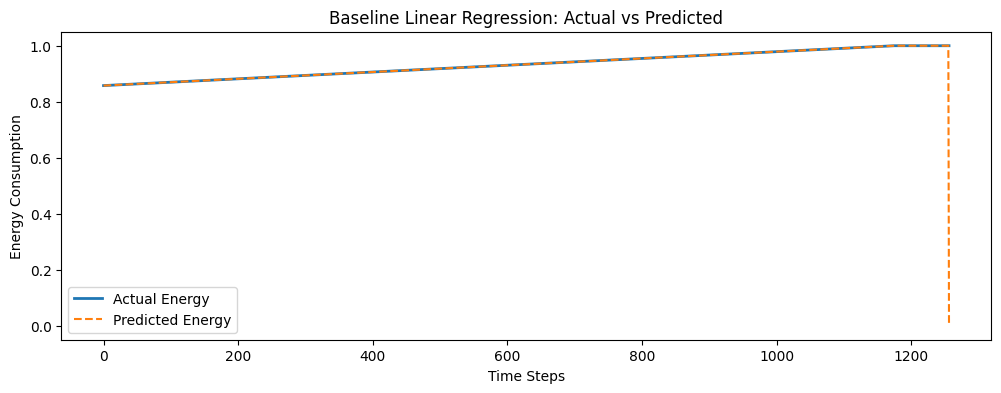

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(y_test.values, label="Actual Energy", linewidth=2)
plt.plot(y_test_pred, label="Predicted Energy", linestyle="--")
plt.xlabel("Time Steps")
plt.ylabel("Energy Consumption")
plt.title("Baseline Linear Regression: Actual vs Predicted")
plt.legend()
plt.show()

vi. Save Baseline Results for Model Comparison.

In [27]:
baseline_results = {
    "Model": "Linear Regression",
    "Validation MAE": val_mae,
    "Validation RMSE": val_rmse,
    "Test MAE": test_mae,
    "Test RMSE": test_rmse
}
baseline_results

{'Model': 'Linear Regression',
 'Validation MAE': 1.464636975041921e-14,
 'Validation RMSE': np.float64(1.7697489258643803e-14),
 'Test MAE': 0.0007955449482962053,
 'Test RMSE': np.float64(0.028205406365910245)}

**Milestone 3 : Week 5-6**

**Module 5: LSTM Model Development**





i. CREATE SEQUENCES FOR LSTM



In [28]:
import numpy as np

# Target column (same as baseline)
target_col = df_features.columns[0] # Explicitly set target_col to the first column, which was used in previous steps

# Convert dataframe to numpy array
data = df_features[target_col].values

# Number of past time steps used for prediction
SEQ_LEN = 24  # last 24 hours

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i + seq_len])
        y.append(data[i + seq_len])
    return np.array(X), np.array(y)

X_seq, y_seq = create_sequences(data, SEQ_LEN)

print("Sequence shape:", X_seq.shape)
print("Target shape:", y_seq.shape)

Sequence shape: (8351, 24)
Target shape: (8351,)


ii. Train / Validation / Test Split

In [29]:
train_size = int(len(X_seq) * 0.7)
val_size = int(len(X_seq) * 0.15)

X_train_seq = X_seq[:train_size]
y_train_seq = y_seq[:train_size]

X_val_seq = X_seq[train_size:train_size + val_size]
y_val_seq = y_seq[train_size:train_size + val_size]

X_test_seq = X_seq[train_size + val_size:]
y_test_seq = y_seq[train_size + val_size:]

# Reshape for LSTM: (samples, timesteps, features)
X_train_seq = X_train_seq.reshape(-1, SEQ_LEN, 1)
X_val_seq = X_val_seq.reshape(-1, SEQ_LEN, 1)
X_test_seq = X_test_seq.reshape(-1, SEQ_LEN, 1)

print("Train shape:", X_train_seq.shape)
print("Validation shape:", X_val_seq.shape)
print("Test shape:", X_test_seq.shape)


Train shape: (5845, 24, 1)
Validation shape: (1252, 24, 1)
Test shape: (1254, 24, 1)


iii. Design and Implement LSTM Architecture

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Hyperparameters
EPOCHS = 30
BATCH_SIZE = 32
LEARNING_RATE = 0.001

model = Sequential([
    LSTM(50, activation='tanh', input_shape=(SEQ_LEN, 1)),
    Dense(1)
])

optimizer = Adam(learning_rate=LEARNING_RATE)
model.compile(optimizer=optimizer, loss='mse')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

iv. Train the LSTM Model

In [31]:
history = model.fit(
    X_train_seq, y_train_seq,
    validation_data=(X_val_seq, y_val_seq),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1
)


Epoch 1/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0171 - val_loss: 3.1171e-05
Epoch 2/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 8.7779e-06 - val_loss: 1.5412e-04
Epoch 3/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 4.2895e-06 - val_loss: 1.9477e-04
Epoch 4/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.8905e-06 - val_loss: 2.0925e-04
Epoch 5/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.6015e-06 - val_loss: 1.8066e-04
Epoch 6/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 3.4111e-06 - val_loss: 1.5287e-04
Epoch 7/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 3.3175e-06 - val_loss: 1.4752e-04
Epoch 8/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 2.9627e-06 - val_loss: 1.5960e-04
Epoch 9/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.7291e-06 - val_loss: 1.3451e-04
Epoch 10/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 2.4470e-06 - val_loss: 1.1963e-04
Epoch 11/30
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step

v. Hyperparameter Tuning





*  Epochs → how long the model trains



*  Learning rate → speed of learning
* Batch size → data processed at once   





*   Create LSTM model function



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

def create_lstm_model(learning_rate):
    model = Sequential()
    model.add(LSTM(50, input_shape=(SEQ_LEN, 1)))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse')

    return model




*   Define hyperparameter values


In [37]:
epochs_list = [20, 30]
batch_size_list = [32, 64]
learning_rate_list = [0.001, 0.0005]




*  Train model with different combinations


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

results = []

for epochs in epochs_list:
    for batch_size in batch_size_list:
        for lr in learning_rate_list:

            print(f"Training with epochs={epochs}, batch_size={batch_size}, learning_rate={lr}")

            model = create_lstm_model(lr)

            model.fit(
                X_train_seq, y_train_seq,
                validation_data=(X_val_seq, y_val_seq),
                epochs=epochs,
                batch_size=batch_size,
                verbose=0
            )

            # Validation prediction
            y_val_pred = model.predict(X_val_seq)
            rmse = np.sqrt(mean_squared_error(y_val_seq, y_val_pred))

            results.append([epochs, batch_size, lr, rmse])


Training with epochs=20, batch_size=32, learning_rate=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Training with epochs=20, batch_size=32, learning_rate=0.0005


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Training with epochs=20, batch_size=64, learning_rate=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training with epochs=20, batch_size=64, learning_rate=0.0005


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training with epochs=30, batch_size=32, learning_rate=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Training with epochs=30, batch_size=32, learning_rate=0.0005


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training with epochs=30, batch_size=64, learning_rate=0.001


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Training with epochs=30, batch_size=64, learning_rate=0.0005


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


*   View best hyperparameter combination

In [39]:
results_df = pd.DataFrame(
    results,
    columns=["Epochs", "Batch Size", "Learning Rate", "Validation RMSE"]
)

results_df.sort_values("Validation RMSE").head()


,Epochs,Batch Size,Learning Rate,Validation RMSE
5,30,32,0.0005,0.001546
6,30,64,0.0010,0.003767
0,20,32,0.0010,0.004746
4,30,32,0.0010,0.004842
1,20,32,0.0005,0.006227


In [32]:
# EPOCHS = 50
# BATCH_SIZE = 64
# LEARNING_RATE = 0.0005

vi. Evaluate LSTM Model (MAE & RMSE)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_test_pred_lstm = model.predict(X_test_seq)

lstm_mae = mean_absolute_error(y_test_seq, y_test_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, y_test_pred_lstm))

print("LSTM MAE :", lstm_mae)
print("LSTM RMSE:", lstm_rmse)


40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
LSTM MAE : 0.0009971020828797234
LSTM RMSE: 0.0010133710565963436


vii. Compare LSTM with Baseline Model

In [34]:
comparison = {
    "Model": ["Linear Regression", "LSTM"],
    "MAE": [baseline_results["Test MAE"], lstm_mae],
    "RMSE": [baseline_results["Test RMSE"], lstm_rmse]
}

comparison


{'Model': ['Linear Regression', 'LSTM'],
 'MAE': [0.0007955449482962053, 0.0009971020828797234],
 'RMSE': [np.float64(0.028205406365910245), np.float64(0.0010133710565963436)]}

**Module 6: Model Evaluation and Integration**





i.Evaluate models using RMSE, MAE, and R2 score.

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ----- Linear Regression Evaluation -----
y_test_pred_lr = baseline_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_test_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))
lr_r2 = r2_score(y_test, y_test_pred_lr)

print("Linear Regression:")
print("MAE :", lr_mae)
print("RMSE:", lr_rmse)
print("R2  :", lr_r2)

# ----- LSTM Evaluation -----
y_test_pred_lstm = model.predict(X_test_seq)

lstm_mae = mean_absolute_error(y_test_seq, y_test_pred_lstm)
lstm_rmse = np.sqrt(mean_squared_error(y_test_seq, y_test_pred_lstm))
lstm_r2 = r2_score(y_test_seq, y_test_pred_lstm)

print("\nLSTM Model:")
print("MAE :", lstm_mae)
print("RMSE:", lstm_rmse)
print("R2  :", lstm_r2)


Linear Regression:
MAE : 0.0007955449482962053
RMSE: 0.028205406365910245
R2  : 0.580328299673377
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

LSTM Model:
MAE : 0.024759763862395964
RMSE: 0.02549986262725726
R2  : 0.65529590763868
